In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_examples(num=1000):
    W =[1.0, -3.0]
    b = 1.0

    W = np.reshape(W,(2,1))
    x = np.random.randn(num, 2)
    y = b + np.dot(x, W) + np.random.randn(num, 1)
    y = np.reshape(y, (num,1))
    return x, y

In [ ]:
x, y = generate_examples()

In [ ]:
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [ ]:
print(x[0], y[0])

[ 1.50202771 -0.27280231] [4.55286757]


In [ ]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [ ]:
model = Model(2)
print(model.W)
print(model.b)

[[-1.14425631]
 [-1.95165509]]
0.30501978757487175


In [ ]:
class Model(Model):
    def forward_pass(self, x):
        y_hat = self.b + np.dot(x, self.W)
        return y_hat

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true)**2) / (2*m)

In [ ]:
y_hat = Model(2).forward_pass(x)
print(y_hat.shape, y_hat[0])

(1000, 1) [2.67412565]


In [ ]:
def compute_loss(self, y_hat, y_true):
    m = y_hat.shape[0]
    return np.sum((y_hat - y_true)**2) / (2*m)


In [ ]:
model = Model(2)
y_hat= model.forward_pass(x)
loss = model.compute_loss(y_hat, y)

In [ ]:
loss

np.float64(5.8445552575953625)

In [ ]:
class Model(Model):
    def backward_pass(self, x, y_true, y_hat):
        m = y_true.shape[0]
        db = 1/m*np.sum(y_hat-y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true), x), axis=0)
        return dW, db

In [ ]:
model = Model(2)
x, y = generate_examples()
y_hat = model.forward_pass(x)
dW, db = model.backward_pass(x, y, y_hat)

In [ ]:
print(dW, db)

[-1.27398696  1.31910514] -0.6950177093877439


In [ ]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W= self.W-lr*np.reshape(dW, (self.num_features,1))
        self.b = self.b-db

In [ ]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses


In [ ]:
import numpy as np

class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y

    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])

    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db

    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db

    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % int(iterations/10) == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses

In [ ]:
model = Model(2)

In [ ]:
x_train, y_train = generate_examples()

In [ ]:
losses = model.train(x_train, y_train, 1000, 3e-2)

Iter: 0, Loss: 11.3813
Iter: 100, Loss: 0.5634
Iter: 200, Loss: 0.5442
Iter: 300, Loss: 0.5442
Iter: 400, Loss: 0.5442
Iter: 500, Loss: 0.5442
Iter: 600, Loss: 0.5442
Iter: 700, Loss: 0.5442
Iter: 800, Loss: 0.5442
Iter: 900, Loss: 0.5442


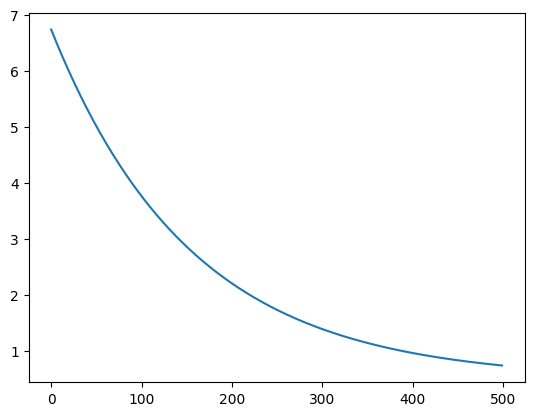

In [ ]:
plt.plot(losses)

In [ ]:
import numpy as np

# ---------------------------
# Data Generator
# ---------------------------
def generate_examples(num=1000):
    W = np.array([[1.0], [-3.0]])   # true weights
    b = 1.0                         # true bias
    x = np.random.randn(num, 2)     # (num,2) features
    noise = np.random.randn(num, 1) # per-sample noise
    y = b + x @ W + noise           # linear relation + noise
    return x, y


# ---------------------------
# Linear Regression Model
# ---------------------------
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, x):
        return self.b + x @ self.W

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true) ** 2) / (2 * m)

    def backward_pass(self, x, y_true, y_hat):
        m   = y_true.shape[0]
        err = y_hat - y_true          # (m,1)
        dW  = (x.T @ err) / m         # (n,1)
        db  = np.sum(err) / m         # scalar
        return dW, db

    def update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

    def train(self, x_train, y_train, iterations=1000, lr=1e-3, log=True):
        losses = []
        log_every = max(iterations // 10, 1)

        for i in range(1, iterations + 1):   # start from 1
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)

            losses.append(loss)

            if log and (i % log_every == 0 or i == 1):
                print(f"Iter: {i}, Loss: {float(loss):.6f}")

        return losses


# ---------------------------
# Training Example
# ---------------------------
x_train, y_train = generate_examples(1000)
model = Model(num_features=2)

losses = model.train(x_train, y_train, iterations=500, lr=3e-3)

print("\nFinal Weights:\n", model.W)
print("Final Bias:\n", model.b)


Iter: 1, Loss: 6.740391
Iter: 50, Loss: 5.043544
Iter: 100, Loss: 3.786197
Iter: 150, Loss: 2.876225
Iter: 200, Loss: 2.217636
Iter: 250, Loss: 1.740970
Iter: 300, Loss: 1.395962
Iter: 350, Loss: 1.146240
Iter: 400, Loss: 0.965480
Iter: 450, Loss: 0.834634
Iter: 500, Loss: 0.739916

Final Weights:
 [[ 0.97807059]
 [-2.34858345]]
Final Bias:
 0.7229639970833203


In [ ]:
model = Model(2)
y_hat= model.forward_pass(x)
loss = model.compute_loss(y_hat, y)

In [ ]:
print(loss)

8.186613244545578
